In [1]:
import pandas as pd

In [2]:
from statsmodels.tsa.stattools import adfuller

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
import statsmodels.api as sm

In [5]:
import statsmodels.api as sm

In [6]:
import pmdarima

In [7]:
from pmdarima.arima import auto_arima

In [8]:
from matplotlib import pyplot as plt

In [9]:
df=pd.read_csv(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\sales_data_add_wes - Python.csv')

In [10]:
df

,Date,Sales
0,01/01/1984,20
1,01/04/1984,12
2,01/07/1984,10
3,01/10/1984,18
4,01/01/1985,23
5,01/04/1985,14
6,01/07/1985,13
7,01/10/1985,22
8,01/01/1986,28
9,01/04/1986,18


In [11]:
df=df.set_index("Date")

In [12]:
split=round(len(df)*0.75)
train=df.iloc[:split,:]
validation=df.iloc[split:,:]

<AxesSubplot:xlabel='Date'>

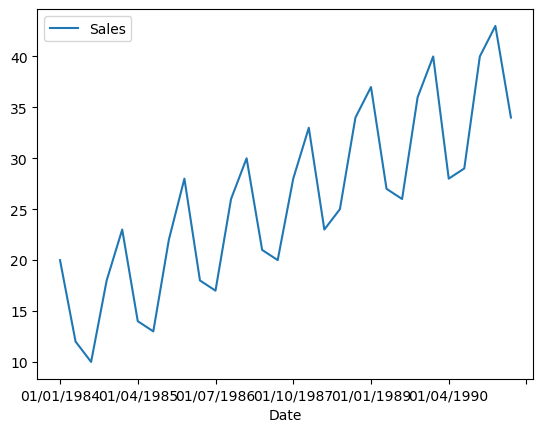

In [13]:
train.plot()

In [14]:
pmdarima.arima.nsdiffs(train['Sales'],m=4)

1

<AxesSubplot:xlabel='Date'>

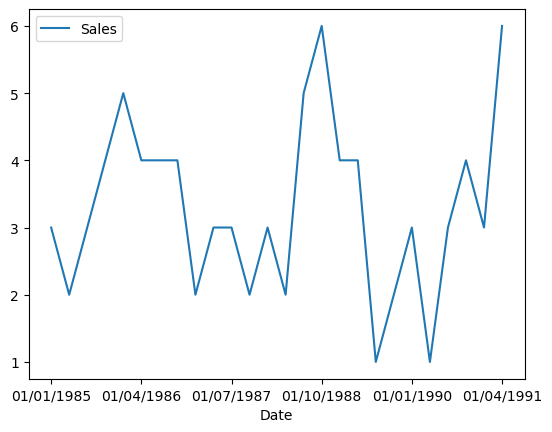

In [15]:
train_seasonal_diff=train.diff(4)
train_seasonal_diff=train_seasonal_diff.dropna()
train_seasonal_diff.plot()

In [16]:
pmdarima.arima.nsdiffs(train_seasonal_diff['Sales'],m=4)

0

In [17]:
adfuller(train_seasonal_diff)

(-3.5271744622837793,
 0.007316015049783615,
 6,
 19,
 {'1%': -3.8326031418574136,
  '5%': -3.0312271701414204,
  '10%': -2.655519584487535},
 49.766877695221794)

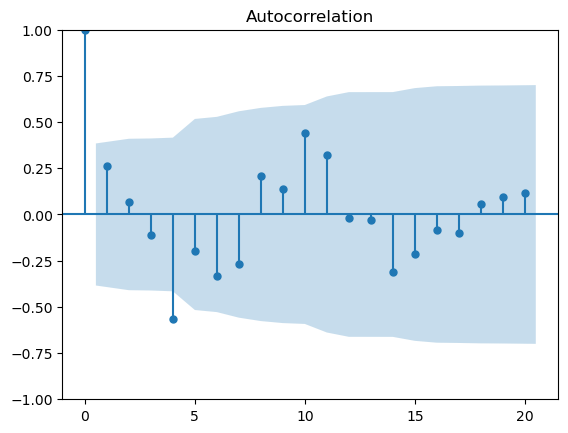

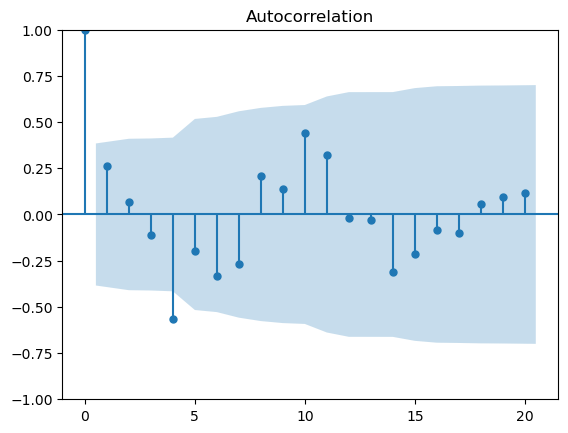

In [18]:
plot_acf(train_seasonal_diff,lags=20)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


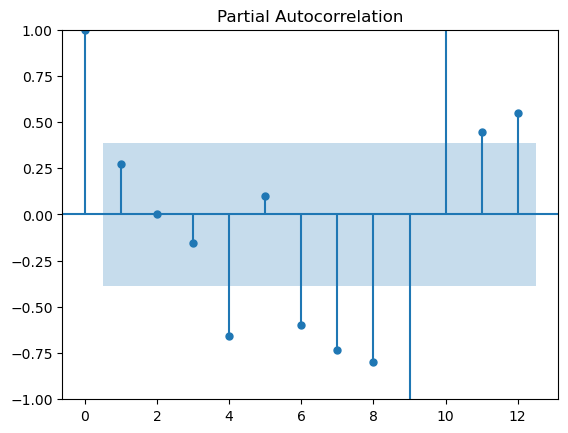

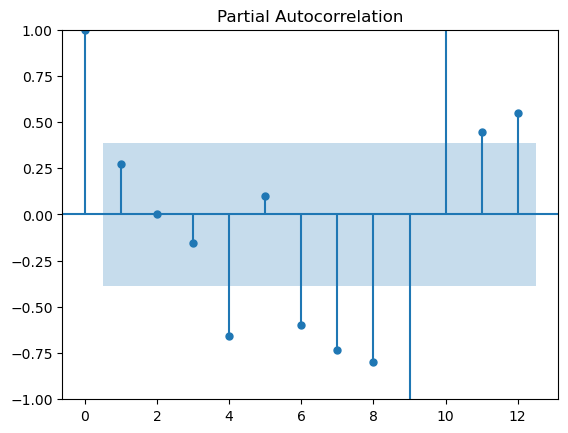

In [19]:
plot_pacf(train_seasonal_diff,lags=12)

In [20]:
sarima = sm.tsa.statespace.SARIMAX(train,order=(1,0,0),seasonal_order=(0,1,1,4)).fit()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [21]:
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   30
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 4)   Log Likelihood                 -44.750
Date:                             Wed, 04 Oct 2023   AIC                             95.499
Time:                                     21:35:21   BIC                             99.274
Sample:                                          0   HQIC                            96.586
                                              - 30                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9853      0.033     29.863      0.000       0.921       1.050
ma.S.L4       -0.5076      0.201     -2.524      0.012      -0.902      -0.113
sigma2         1.6045      0.504      3.185      0.001       0.617       2.592
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):                 0.25
Prob(Q):                              0.21   Prob(JB):                         0.88
Heteroskedasticity (H):               2.00   Skew:                             0.11
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:

auto_model = auto_arima(train,start_q=0,start_p=0,start_P=0,start_Q=0,m=4,information_criterion='aic')
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   30
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 4)   Log Likelihood                 -35.148
Date:                           Wed, 04 Oct 2023   AIC                             80.297
Time:                                   21:35:25   BIC                             86.587
Sample:                                        0   HQIC                            82.108
                                            - 30                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.2896      1.390      3.806      0.000       2.566       8.014
ar.L1          0.4323      0.223      1.938      0.053      -0.005       0.870
ar.L2         -0.3642      0.208     -1.751      0.080      -0.772       0.043
ar.S.L4       -0.7222      0.143     -5.033      0.000      -1.003      -0.441
sigma2         0.7708      0.337      2.284      0.022       0.109       1.432
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.97   Prob(JB):                         0.56
Heteroskedasticity (H):               1.74   Skew:                             0.08
Prob(H) (two-sided):                  0.42   Kurtosis:                         1.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
forecasts, conf_int  = auto_model.predict(len(validation),return_conf_int=True,alpha=0.05)
conf_int_df=pd.DataFrame(conf_int)
conf_int_df.rename(columns = {0:'LFI',1:'UFI'}, inplace = True)
forecasts_df=pd.DataFrame(forecasts)
forecasts_df.rename(columns = {0:'Forecasts'}, inplace = True)
in_sample=auto_model.predict_in_sample()
in_sample=in_sample.reset_index(drop=True)
in_sample_df=pd.DataFrame(in_sample)
in_sample_df

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,predicted_mean
0,3.295911
1,3.295925
2,3.295916
3,3.295902
4,23.295891
5,15.174194
6,12.694783
7,21.415846
8,26.763581
9,18.614161


In [24]:
validation=validation.reset_index(drop=True)
validation
forecasts_df=forecasts_df.reset_index(drop=True)
validation
validation_forecasts_conf_int_df=pd.concat([validation,forecasts_df,conf_int_df],axis=1)
train=train.reset_index(drop=True)
train
in_sample_df
in_sample_train_df=pd.concat([in_sample_df,train],axis=1)
in_sample_train_df
final=pd.concat([in_sample_train_df,validation_forecasts_conf_int_df])
final=final.reset_index(drop=True)
final["Date"] = pd.date_range(start ='01/01/1984', freq ='QS', periods = 40)
final=final.set_index(final["Date"])
final=final.drop(['Date'], axis=1)
final


,predicted_mean,Sales,Forecasts,LFI,UFI
Date,,,,,
1984-01-01,3.295911,20,NaN,NaN,NaN
1984-04-01,3.295925,12,NaN,NaN,NaN
1984-07-01,3.295916,10,NaN,NaN,NaN
1984-10-01,3.295902,18,NaN,NaN,NaN
1985-01-01,23.295891,23,NaN,NaN,NaN
1985-04-01,15.174194,14,NaN,NaN,NaN
1985-07-01,12.694783,13,NaN,NaN,NaN
1985-10-01,21.415846,22,NaN,NaN,NaN
1986-01-01,26.763581,28,NaN,NaN,NaN


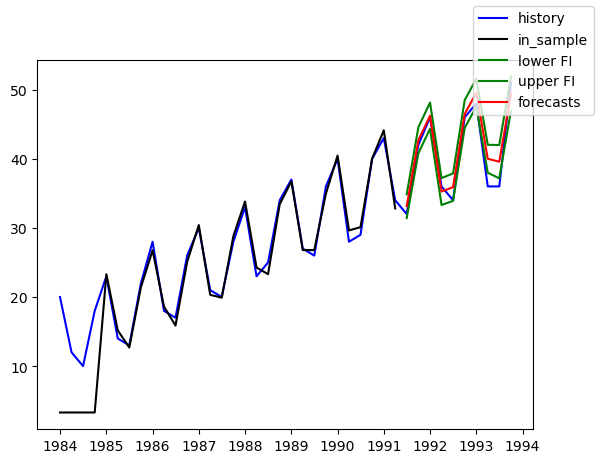

In [25]:
fig, ax = plt.subplots()
ax.plot(final["Sales"],color='blue',label='history')
ax.plot(final["predicted_mean"],color='black',label='in_sample')
ax.plot(final["LFI"],color='green',label='lower FI')
ax.plot(final["UFI"],color='green',label='upper FI')
ax.plot(final["Forecasts"],color='red',label='forecasts')
fig.legend()

In [26]:
import numpy as np
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
               # ACF1
    return({'mape':mape, 'mae': mae,  'rmse':rmse})

In [27]:
forecast_accuracy(final["Forecasts"],final["Sales"])

{'mape': 0.041830109344769564,
 'mae': 1.591551377784183,
 'rmse': 2.00078887034774}

In [28]:
sarimax = sm.tsa.statespace.SARIMAX(df,order=auto_model.order,seasonal_order=auto_model.seasonal_order).fit()
sarimax.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                   40
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 4)   Log Likelihood                 -65.613
Date:                           Wed, 04 Oct 2023   AIC                            139.226
Time:                                   21:35:25   BIC                            145.560
Sample:                                        0   HQIC                           141.437
                                            - 40                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8288      0.216      3.829      0.000       0.405       1.253
ar.L2          0.1350      0.211      0.641      0.522      -0.278       0.548
ar.S.L4       -0.4172      0.217     -1.923      0.054      -0.842       0.008
sigma2         2.0811      0.563      3.697      0.000       0.978       3.184
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.10
Prob(Q):                              0.68   Prob(JB):                         0.58
Heteroskedasticity (H):               3.84   Skew:                             0.42
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
pred = sarimax.get_forecast(steps = 8)
forecasts=pred.predicted_mean
ci=pred.conf_int()
forecasts_df=pd.DataFrame(forecasts)
ci_df=pd.DataFrame(ci)
predictions_df=pd.concat([forecasts_df,ci_df],axis=1)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [30]:
predictions_df

,predicted_mean,lower Sales,upper Sales
40,53.075364,50.247921,55.902807
41,41.798502,38.126216,45.470787
42,40.769395,36.423540,45.115249
43,54.341403,49.451074,59.231732
44,56.212834,50.007228,62.418440
45,44.467500,37.358107,51.576893
46,43.706215,35.829539,51.582891
47,57.717591,49.185722,66.249461


In [31]:
final=pd.concat([df,predictions_df],axis=1)
final=final.reset_index(drop=True)
final["Date"] = pd.date_range(start ='01/01/1984', freq ='QS', periods = 48)
final=final.set_index(final["Date"])
final=final.drop(['Date'], axis=1)

In [32]:
final

,Sales,predicted_mean,lower Sales,upper Sales
Date,,,,
1984-01-01,20.0,NaN,NaN,NaN
1984-04-01,12.0,NaN,NaN,NaN
1984-07-01,10.0,NaN,NaN,NaN
1984-10-01,18.0,NaN,NaN,NaN
1985-01-01,23.0,NaN,NaN,NaN
1985-04-01,14.0,NaN,NaN,NaN
1985-07-01,13.0,NaN,NaN,NaN
1985-10-01,22.0,NaN,NaN,NaN
1986-01-01,28.0,NaN,NaN,NaN


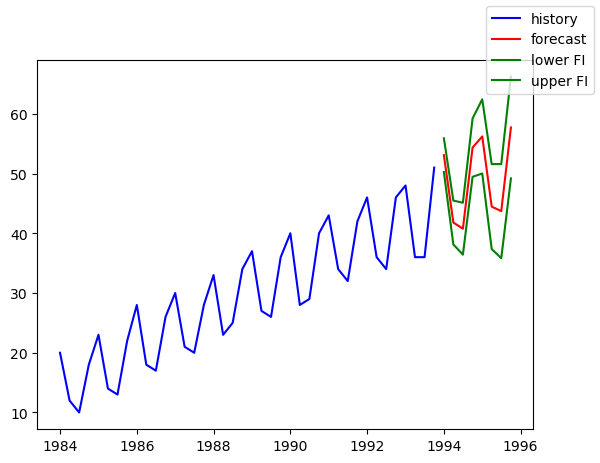

In [33]:
fig, ax = plt.subplots()
ax.plot(final["Sales"],color='blue',label='history')
ax.plot(final["predicted_mean"],color='red',label='forecast')
ax.plot(final["lower Sales"],color='green',label='lower FI')
ax.plot(final["upper Sales"],color='green',label='upper FI')
fig.legend()